In [1]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# Chargement du jeu de données
path= './Dataset.csv'
data= pd.read_csv(path)

## Préparation des données

### Partie A: Exploration des données

In [3]:
# Vérification des types
data.dtypes

ID                    object
Datetime              object
Sensor1_PM2.5        float64
Sensor2_PM2.5        float64
Temperature          float64
Relative_Humidity    float64
Offset_fault           int64
dtype: object

In [4]:
data.head(10)

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0
5,ID_1A9CVG5BBKRT,2022-01-13 09:07:32,27.58,18.92,26.1,57.0,1
6,ID_O598XNF3QQ7H,2021-12-18 02:25:06,43.62,34.62,20.6,86.0,1
7,ID_MUEQIKPY6X5O,2021-11-11 04:18:59,104.35,98.00,20.3,94.0,0
8,ID_YOGZ8Q8O97ON,2021-12-19 06:17:43,19.22,13.25,19.3,92.0,1
9,ID_FR804PILRAZ0,2022-01-01 16:19:02,2.02,5.22,27.1,66.0,0


In [5]:
data.describe()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,293563.000000,293563.000000,293628.000000,293628.000000,297177.000000
mean,40.751195,38.183018,23.316554,78.653623,0.371072
std,28.526182,28.647761,3.836971,14.772725,0.483092
min,-9.450000,-9.700000,16.700000,27.000000,0.000000
25%,22.430000,19.520000,20.400000,68.000000,0.000000
50%,36.470000,33.720000,21.900000,84.000000,0.000000
75%,49.420000,47.570000,26.300000,91.000000,1.000000
max,997.960000,997.260000,34.900000,99.000000,1.000000


### Visualisation graphique

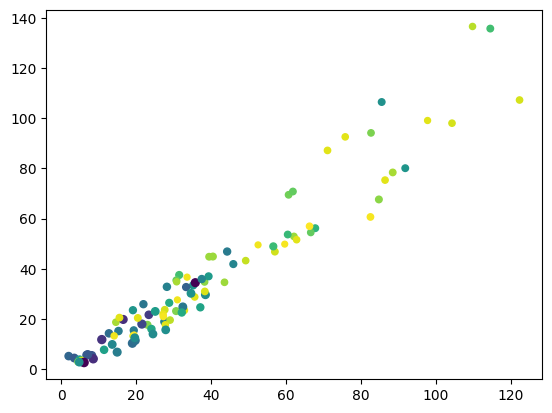

In [6]:
plt.scatter(data[data['Offset_fault']==0].iloc[:50, 2], data[data['Offset_fault']==0].iloc[:50, 3], data[data['Offset_fault']==0].iloc[:50, 4], c=data[data['Offset_fault']==0].iloc[:50, 5])
plt.scatter(data[data['Offset_fault']==1].iloc[:50, 2], data[data['Offset_fault']==1].iloc[:50, 3], data[data['Offset_fault']==1].iloc[:50, 4], c=data[data['Offset_fault']==1].iloc[:50, 5])

plt.show()

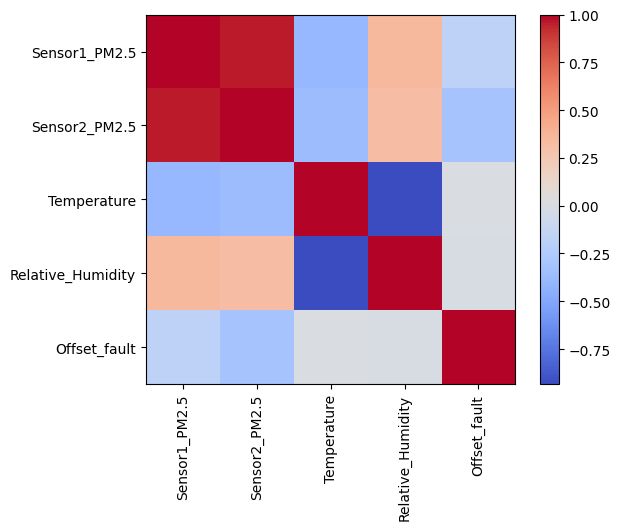

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
df = data.drop(['ID', 'Datetime'], axis=1)
corr_matrix = df.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.show()

### Partie B: Prétraitement des données

In [8]:
# Classe pour la mise à échelle des features
class MyStandardScaler:
    
    def __init__(self):
        self.mean_ = None
        self.scale_ = None
        
    def fit(self, X):
        self.mean_ = X.mean()
        self.scale_ = X.std()
        
    def transform(self, X):
        X = (X - self.mean_) / self.scale_
        return X.values
        
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [9]:
def create_dataframe(df):
    """
    Cette fonction prend en entrée un DataFrame et retourne un nouveau DataFrame qui contient les 1/15 des lignes
    du DataFrame d'origine.
    """
    length = len(df) // 15  # division entière pour obtenir la longueur de la moitié du DataFrame
    new_df = df.iloc[:length, :]  # sélectionner les premières lignes jusqu'à la moitié du DataFrame
    return new_df


In [10]:
def split_data(df, train_percent= 0.8):
    """
        Fonction pour le decoupage du jeu de données
        en données d'entrainement et de teste
    """

    df = create_dataframe(df)

    scaler = MyStandardScaler()
    np.random.seed(2)
    perm = np.random.permutation(df.index)

    n= len(df)
    train_index = int(train_percent * n)
    

    train = df.iloc[perm[:train_index]]
    test = df.iloc[perm[train_index:]]

    x_train, x_test, y_train, y_test = train.iloc[:, [2, 3, 4, 5]], test.iloc[:, [2, 3, 4, 5]], np.array(train.loc[:, 'Offset_fault']).reshape(-1, 1), np.array(test.loc[:, 'Offset_fault']).reshape(-1, 1) 
    scaler.fit(x_train)
    scaler.fit(x_test)
    #[2, 3, 4, 5]

    x_train_norm = scaler.fit_transform(x_train)
    x_test_norm = scaler.fit_transform(x_test)

    return x_train_norm, x_test_norm, y_train, y_test

In [11]:
#Combler les lignes manquantes

mean_Sensor1 = data['Sensor1_PM2.5'].mean() 
mean_Sensor2 = data['Sensor2_PM2.5'].mean()
mean_Temp = data['Temperature'].mean()
mean_Hum = data['Relative_Humidity'].mean()

data['Sensor1_PM2.5'].fillna(value = mean_Sensor1, inplace=True) 
data['Sensor2_PM2.5'].fillna(value = mean_Sensor2, inplace=True) 
data['Temperature'].fillna(value = mean_Temp, inplace=True) 
data['Relative_Humidity'].fillna(value = mean_Hum, inplace=True)

In [12]:
data.describe()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,297177.000000,297177.000000,297177.000000,297177.000000,297177.000000
mean,40.751195,38.183018,23.316554,78.653623,0.371072
std,28.352196,28.473034,3.813991,14.684249,0.483092
min,-9.450000,-9.700000,16.700000,27.000000,0.000000
25%,22.650000,19.700000,20.400000,68.000000,0.000000
50%,36.770000,34.020000,22.000000,83.000000,0.000000
75%,49.220000,47.380000,26.300000,91.000000,1.000000
max,997.960000,997.260000,34.900000,99.000000,1.000000


In [13]:
X_train, X_test, y_train, y_test = split_data(data)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15848, 4), (3963, 4), (15848, 1), (3963, 1))

/home/maeladab/.local/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


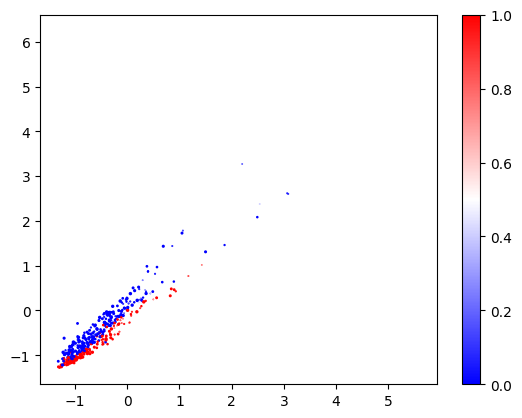

In [14]:
import matplotlib.pyplot as plt

# Combinez les quatre premières colonnes de X_train en une seule matrice 2D
X_subset = X_train[:1000, :4]

# Tracez le nuage de points en utilisant les deux premières colonnes pour la position et la troisième colonne pour la taille
# Utilisez la quatrième colonne pour la couleur en fonction de y_train
plt.scatter(X_subset[:, 0], X_subset[:, 1], s=X_subset[:, 2], c=y_train[:1000], cmap='bwr')

# Ajoutez une légende
plt.colorbar()

# Afficher le graphe
plt.show()

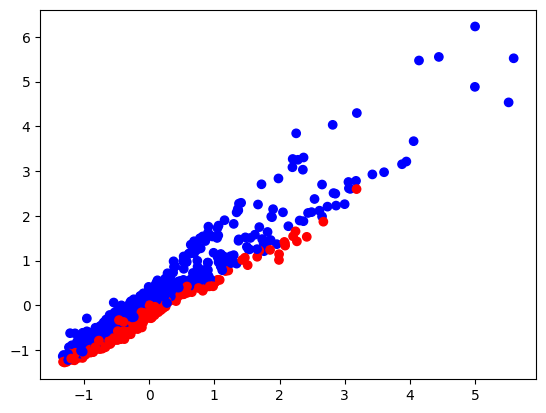

In [15]:
plt.scatter(X_train[:1000,0], X_train[:1000,1],  c=y_train[:1000], cmap='bwr')
plt.show()

# PARTIE 2: IMPLEMENTATION DU SVM POUR UN PROBLEME DE CLASSIFICATION BINAIRE

Fonction coût: $$ J(w) = \frac 1 2 ||w||^2 + \frac c m \sum \max(1-y_i (w_0+x_i .w),0) $$

Prédiction:         $$pred(X) = sign(X.W) = \hat y$$

$\mathbf{x}_i$ est le i-ème vecteur de caractéristiques, $y_i$ est la vraie étiquette de classe de $\mathbf{x}_i$, et $\mathbf{w}$ est le vecteur de poids.

$\nabla_{\mathbf{w}} hinge_loss(\mathbf{w}) = \frac{1}{n} \sum_{i=1}^{n} \begin{cases}
-y_i \mathbf{x}_i, & \text{si}\ y_i(\mathbf{w} \cdot \mathbf{x}_i) < 1 \
0, & \text{sinon}
\end{cases}$

où $\nabla_{\mathbf{w}}$ est l'opérateur gradient par rapport à $\mathbf{w}$.

In [19]:
class support_vector_machine():
    # Initialisation de l'objet avec les données d'entraînement, la constante de pénalisation et une graine aléatoire
    def __init__(self, X, C, seed=123):
        self.x_t = X
        m, n = X.shape
        np.random.seed(seed)
        # Initialisation des paramètres de theta
        self.theta = np.random.rand(n+1, 1)
        self.C = C
    
    # Prédiction de la classe de chaque exemple donné en entrée
    def predict(self, X):
        m, n = X.shape
        # Ajout d'une colonne de 1 pour permettre la multiplication matricielle avec theta
        X_1 = np.hstack((np.ones((m, 1)), X))
        # Calcul de la prédiction en comparant la sortie de la multiplication avec un seuil de 0
        return np.dot(X_1, self.theta)>0
    
    # Fonction de perte de charnière (hinge loss)
    def hinge_loss(self, y, y_hat):
        m, _ = y.shape

        # Transformation de la sortie attendue en {-1, 1} pour simplifier les calculs
        y_1 = np.copy(y)
        y_1[y_1==0] = -1

        # Calcul de la norme de theta et de la somme maximale de la fonction de perte de charnière
        norm_theta = np.power(np.linalg.norm(self.theta), 2)
        max_sum = np.sum(np.where((1 - np.multiply(y_1, y_hat)) > 0, 1, 0) * (self.C * (1 - y_1 * y_hat))/ m)

        # Calcul de la fonction de perte finale
        return 1/2 * norm_theta + max_sum
    
    def fit(self, x, y, learning_rate=0.001, num_iters=200):
        # On récupère les dimensions de x
        m, n = x.shape
        
        # On remplace les 0 de y par -1
        y_1 = np.copy(y)
        y_1[y_1==0] = -1
        
        # On ajoute une colonne de 1 à x pour le biais
        x_1 = np.hstack((np.ones((m, 1)), x))
        
        # On initialise le tableau pour stocker les valeurs de la fonction de coût
        J_history = np.zeros(num_iters)

        # Boucle d'entrainement sur un certain nombre d'itérations
        for i in range(0, num_iters):
            # On met à jour les poids ou paramètres
            self.theta = self.theta - learning_rate * (self.theta - np.sum(np.where((1 - np.multiply(y_1, np.dot(x_1, self.theta))) > 0, 1, 0) * (self.C/m)*y_1*x_1,axis=0).reshape(-1, 1))

            # On calcule la fonction de coût pour cette itération et on la stocke
            J_history[i] = self.hinge_loss(y_1, np.dot(x_1, self.theta))
            print(f"\nEpoch {i}, loss {J_history[i]}")
        
        # On renvoie le tableau des valeurs de la fonction de coût
        return J_history

    def accuracy(self,y_test, y_pred):
        # On calcule l'accuracy en pourcentage
        accuracy = 100 * np.sum(y_test == y_pred) / len(y_test)
        return accuracy


In [21]:
model = support_vector_machine(X_train, 1700)
history = model.fit(X_train, y_train, learning_rate=0.0001, num_iters=10000)


Epoch 0, loss 2161.6443904866996

Epoch 1, loss 2092.3603074979214

Epoch 2, loss 2028.448666690886

Epoch 3, loss 1969.4712448645926

Epoch 4, loss 1913.8468045102563

Epoch 5, loss 1860.2586144592547

Epoch 6, loss 1807.1364098115434

Epoch 7, loss 1755.17770216725

Epoch 8, loss 1705.6035373807783

Epoch 9, loss 1660.9343094586313

Epoch 10, loss 1620.4284313338896

Epoch 11, loss 1586.536891145378

Epoch 12, loss 1557.976818894892

Epoch 13, loss 1533.8834329304393

Epoch 14, loss 1512.83839240362

Epoch 15, loss 1493.7629037881723

Epoch 16, loss 1476.0601132880504

Epoch 17, loss 1459.6179477121561

Epoch 18, loss 1444.4671714510957

Epoch 19, loss 1430.4866559686975

Epoch 20, loss 1417.3756311411896

Epoch 21, loss 1404.977618814644

Epoch 22, loss 1393.1115151303572

Epoch 23, loss 1381.7152053498808

Epoch 24, loss 1370.7987846487677

Epoch 25, loss 1360.3425078401597

Epoch 26, loss 1350.270681412502

Epoch 27, loss 1340.637509465713

Epoch 28, loss 1331.4137345835672

Epoc


Epoch 289, loss 936.1947739303033

Epoch 290, loss 935.2602131423919

Epoch 291, loss 934.3261839167571

Epoch 292, loss 933.3939615860075

Epoch 293, loss 932.4652767424551

Epoch 294, loss 931.5400569551259

Epoch 295, loss 930.6151882666056

Epoch 296, loss 929.6909619603515

Epoch 297, loss 928.7672070969764

Epoch 298, loss 927.8437148676395

Epoch 299, loss 926.9217965445047

Epoch 300, loss 926.0002465561967

Epoch 301, loss 925.080176941887

Epoch 302, loss 924.1616311856069

Epoch 303, loss 923.2438627239728

Epoch 304, loss 922.327363869369

Epoch 305, loss 921.4117077719825

Epoch 306, loss 920.4969694985778

Epoch 307, loss 919.5833582631561

Epoch 308, loss 918.6712987896099

Epoch 309, loss 917.7595917207319

Epoch 310, loss 916.8484329910051

Epoch 311, loss 915.9378662762919

Epoch 312, loss 915.0285159284832

Epoch 313, loss 914.1200419444601

Epoch 314, loss 913.2134202969228

Epoch 315, loss 912.3072343807254

Epoch 316, loss 911.4024342557625

Epoch 317, loss 910.4


Epoch 600, loss 728.2152505064165

Epoch 601, loss 727.7872624461517

Epoch 602, loss 727.3604427730057

Epoch 603, loss 726.9346543418084

Epoch 604, loss 726.5094405865

Epoch 605, loss 726.0850372892666

Epoch 606, loss 725.6615913046013

Epoch 607, loss 725.2385128697591

Epoch 608, loss 724.816006534949

Epoch 609, loss 724.395123017484

Epoch 610, loss 723.9761919972354

Epoch 611, loss 723.5581962536845

Epoch 612, loss 723.1413958177379

Epoch 613, loss 722.7256126081572

Epoch 614, loss 722.3112462662287

Epoch 615, loss 721.8983764378271

Epoch 616, loss 721.4865385683289

Epoch 617, loss 721.0754970453586

Epoch 618, loss 720.6660569102047

Epoch 619, loss 720.2575285530004

Epoch 620, loss 719.8503778174831

Epoch 621, loss 719.4442608334136

Epoch 622, loss 719.038826862059

Epoch 623, loss 718.6344628922517

Epoch 624, loss 718.2316601725248

Epoch 625, loss 717.829871280571

Epoch 626, loss 717.4293506986095

Epoch 627, loss 717.0315043712889

Epoch 628, loss 716.635230


Epoch 929, loss 636.5796577657092

Epoch 930, loss 636.4113563029371

Epoch 931, loss 636.2434273723427

Epoch 932, loss 636.0756084984965

Epoch 933, loss 635.907938290002

Epoch 934, loss 635.7404545294958

Epoch 935, loss 635.5731815595714

Epoch 936, loss 635.4061099959478

Epoch 937, loss 635.2393396260602

Epoch 938, loss 635.0730644715567

Epoch 939, loss 634.9071513235758

Epoch 940, loss 634.7416408009263

Epoch 941, loss 634.5766202044973

Epoch 942, loss 634.4120946402807

Epoch 943, loss 634.2480641937848

Epoch 944, loss 634.0842199578668

Epoch 945, loss 633.9208459377738

Epoch 946, loss 633.7577900729561

Epoch 947, loss 633.5953599393564

Epoch 948, loss 633.4337217205244

Epoch 949, loss 633.2728062223666

Epoch 950, loss 633.1125337134715

Epoch 951, loss 632.9527714344317

Epoch 952, loss 632.7932274695218

Epoch 953, loss 632.6341693894555

Epoch 954, loss 632.4754522703196

Epoch 955, loss 632.3169767801202

Epoch 956, loss 632.1590789098348

Epoch 957, loss 632.


Epoch 1179, loss 604.8546627004034

Epoch 1180, loss 604.7608589866799

Epoch 1181, loss 604.6672331931013

Epoch 1182, loss 604.5737267584317

Epoch 1183, loss 604.4803053260789

Epoch 1184, loss 604.3870141927621

Epoch 1185, loss 604.2938003355677

Epoch 1186, loss 604.2006661979548

Epoch 1187, loss 604.1077968031445

Epoch 1188, loss 604.0150323038392

Epoch 1189, loss 603.922359495458

Epoch 1190, loss 603.8301412862974

Epoch 1191, loss 603.7381646759417

Epoch 1192, loss 603.6464746453394

Epoch 1193, loss 603.55498651134

Epoch 1194, loss 603.4636653764352

Epoch 1195, loss 603.3725907761903

Epoch 1196, loss 603.281731539273

Epoch 1197, loss 603.1911401712066

Epoch 1198, loss 603.100816034482

Epoch 1199, loss 603.0106613183298

Epoch 1200, loss 602.9206909581263

Epoch 1201, loss 602.8308843362269

Epoch 1202, loss 602.741221555772

Epoch 1203, loss 602.6515941563675

Epoch 1204, loss 602.562107709284

Epoch 1205, loss 602.4728463718268

Epoch 1206, loss 602.3837882657342


Epoch 1494, loss 582.6022763235494

Epoch 1495, loss 582.5498817085548

Epoch 1496, loss 582.4975109892173

Epoch 1497, loss 582.4452849814146

Epoch 1498, loss 582.3932716335186

Epoch 1499, loss 582.3413585934678

Epoch 1500, loss 582.2895149550478

Epoch 1501, loss 582.2376827586033

Epoch 1502, loss 582.1859065918522

Epoch 1503, loss 582.1342339631714

Epoch 1504, loss 582.0826588932267

Epoch 1505, loss 582.0311892579598

Epoch 1506, loss 581.9798138346739

Epoch 1507, loss 581.9285318273885

Epoch 1508, loss 581.877433974007

Epoch 1509, loss 581.8264269737622

Epoch 1510, loss 581.7755160917543

Epoch 1511, loss 581.7247101937604

Epoch 1512, loss 581.6740133253066

Epoch 1513, loss 581.6233646766848

Epoch 1514, loss 581.5727815573584

Epoch 1515, loss 581.5222769848937

Epoch 1516, loss 581.4718145536693

Epoch 1517, loss 581.4214576313149

Epoch 1518, loss 581.3711256247066

Epoch 1519, loss 581.3208376765306

Epoch 1520, loss 581.2706372600273

Epoch 1521, loss 581.2205199


Epoch 1772, loss 570.8692259971738

Epoch 1773, loss 570.8360374405638

Epoch 1774, loss 570.802872196286

Epoch 1775, loss 570.7697805505398

Epoch 1776, loss 570.7367289049828

Epoch 1777, loss 570.7037238243104

Epoch 1778, loss 570.6707913653197

Epoch 1779, loss 570.6378916960049

Epoch 1780, loss 570.6049986062953

Epoch 1781, loss 570.5721315369245

Epoch 1782, loss 570.5393009670207

Epoch 1783, loss 570.5064875382527

Epoch 1784, loss 570.4737626334828

Epoch 1785, loss 570.4411158310461

Epoch 1786, loss 570.4085120331731

Epoch 1787, loss 570.3759285974866

Epoch 1788, loss 570.3433914463642

Epoch 1789, loss 570.3109011932996

Epoch 1790, loss 570.2784174379608

Epoch 1791, loss 570.2459401790481

Epoch 1792, loss 570.2134694152626

Epoch 1793, loss 570.1810272890507

Epoch 1794, loss 570.1487088743627

Epoch 1795, loss 570.1163969230345

Epoch 1796, loss 570.0841019002645

Epoch 1797, loss 570.0518291365543

Epoch 1798, loss 570.0195837296935

Epoch 1799, loss 569.9873467


Epoch 2034, loss 563.6814050628084

Epoch 2035, loss 563.6590456066469

Epoch 2036, loss 563.6366906221532

Epoch 2037, loss 563.6143410912819

Epoch 2038, loss 563.5920492472073

Epoch 2039, loss 563.5698387302119

Epoch 2040, loss 563.5476687463271

Epoch 2041, loss 563.525504097075

Epoch 2042, loss 563.503347577075

Epoch 2043, loss 563.4812386658903

Epoch 2044, loss 563.4592092734258

Epoch 2045, loss 563.4372376546714

Epoch 2046, loss 563.4153096069001

Epoch 2047, loss 563.3933859445191

Epoch 2048, loss 563.3714697102029

Epoch 2049, loss 563.34957366312

Epoch 2050, loss 563.3276819950277

Epoch 2051, loss 563.3057947050498

Epoch 2052, loss 563.2839265660534

Epoch 2053, loss 563.262120295306

Epoch 2054, loss 563.2404285935093

Epoch 2055, loss 563.2187696330258

Epoch 2056, loss 563.1971761364377

Epoch 2057, loss 563.1755869583332

Epoch 2058, loss 563.1540020978482

Epoch 2059, loss 563.1324424203669

Epoch 2060, loss 563.1108945604002

Epoch 2061, loss 563.08937691526


Epoch 2292, loss 558.8342900426898

Epoch 2293, loss 558.8185295056132

Epoch 2294, loss 558.8028305763303

Epoch 2295, loss 558.7871622613116

Epoch 2296, loss 558.7715228089833

Epoch 2297, loss 558.7559564029943

Epoch 2298, loss 558.7404517743564

Epoch 2299, loss 558.7249907134244

Epoch 2300, loss 558.7095532246174

Epoch 2301, loss 558.6941519295826

Epoch 2302, loss 558.6787970860495

Epoch 2303, loss 558.6634586566754

Epoch 2304, loss 558.6481232948338

Epoch 2305, loss 558.63279297438

Epoch 2306, loss 558.6174686078682

Epoch 2307, loss 558.6021473321881

Epoch 2308, loss 558.5868308679396

Epoch 2309, loss 558.5715432919002

Epoch 2310, loss 558.5562700703786

Epoch 2311, loss 558.5410140847172

Epoch 2312, loss 558.5257998321798

Epoch 2313, loss 558.5106267434047

Epoch 2314, loss 558.4954844789729

Epoch 2315, loss 558.480403874356

Epoch 2316, loss 558.4653262857094

Epoch 2317, loss 558.4502517124297

Epoch 2318, loss 558.4351801539138

Epoch 2319, loss 558.420111609


Epoch 2543, loss 555.5597488285237

Epoch 2544, loss 555.5490365494697

Epoch 2545, loss 555.5383325329549

Epoch 2546, loss 555.5276587901411

Epoch 2547, loss 555.5169871819691

Epoch 2548, loss 555.506317708012

Epoch 2549, loss 555.4956553388565

Epoch 2550, loss 555.4850098467078

Epoch 2551, loss 555.4743664835512

Epoch 2552, loss 555.4637252489607

Epoch 2553, loss 555.4530861425108

Epoch 2554, loss 555.4424491637757

Epoch 2555, loss 555.4318183719165

Epoch 2556, loss 555.4211945829106

Epoch 2557, loss 555.4105729185565

Epoch 2558, loss 555.399973457877

Epoch 2559, loss 555.3894276057927

Epoch 2560, loss 555.3788887950047

Epoch 2561, loss 555.3683538836628

Epoch 2562, loss 555.3578356927559

Epoch 2563, loss 555.3473228753907

Epoch 2564, loss 555.3368511368484

Epoch 2565, loss 555.3264014515254

Epoch 2566, loss 555.3159668809046

Epoch 2567, loss 555.3055343970938

Epoch 2568, loss 555.2951039996752

Epoch 2569, loss 555.2846756882319

Epoch 2570, loss 555.27424946


Epoch 2798, loss 553.2074982584676

Epoch 2799, loss 553.1996998612226

Epoch 2800, loss 553.1919051858953

Epoch 2801, loss 553.1841120694252

Epoch 2802, loss 553.1763205115003

Epoch 2803, loss 553.1685312686601

Epoch 2804, loss 553.1607457156153

Epoch 2805, loss 553.1529755542412

Epoch 2806, loss 553.1452382389746

Epoch 2807, loss 553.137529280532

Epoch 2808, loss 553.1298369880169

Epoch 2809, loss 553.1221531361558

Epoch 2810, loss 553.1144799375845

Epoch 2811, loss 553.1068056617628

Epoch 2812, loss 553.0991578384559

Epoch 2813, loss 553.0915168017938

Epoch 2814, loss 553.083887463075

Epoch 2815, loss 553.0762596501479

Epoch 2816, loss 553.068639346979

Epoch 2817, loss 553.0610401232055

Epoch 2818, loss 553.0534424192007

Epoch 2819, loss 553.0458462346609

Epoch 2820, loss 553.0382515692818

Epoch 2821, loss 553.03065842276

Epoch 2822, loss 553.0230667947915

Epoch 2823, loss 553.015484461457

Epoch 2824, loss 553.0079384652179

Epoch 2825, loss 553.000412627069


Epoch 3037, loss 551.5585833288153

Epoch 3038, loss 551.5524420326495

Epoch 3039, loss 551.5463136139833

Epoch 3040, loss 551.5401946514556

Epoch 3041, loss 551.5340876446452

Epoch 3042, loss 551.5279968432801

Epoch 3043, loss 551.5219096701362

Epoch 3044, loss 551.5158445548831

Epoch 3045, loss 551.5097963384617

Epoch 3046, loss 551.5037493316233

Epoch 3047, loss 551.4977035341257

Epoch 3048, loss 551.4916589457272

Epoch 3049, loss 551.4856155661859

Epoch 3050, loss 551.47957339526

Epoch 3051, loss 551.4735336882817

Epoch 3052, loss 551.4675168783193

Epoch 3053, loss 551.4615012716587

Epoch 3054, loss 551.4554868680591

Epoch 3055, loss 551.4494789644626

Epoch 3056, loss 551.4434850948825

Epoch 3057, loss 551.4374977722634

Epoch 3058, loss 551.4315304499497

Epoch 3059, loss 551.4255643210408

Epoch 3060, loss 551.4196073583386

Epoch 3061, loss 551.4136639268801

Epoch 3062, loss 551.4077229868751

Epoch 3063, loss 551.4017949266445

Epoch 3064, loss 551.39587298


Epoch 3267, loss 550.335368399692

Epoch 3268, loss 550.3307580179999

Epoch 3269, loss 550.326151167244

Epoch 3270, loss 550.3215573154855

Epoch 3271, loss 550.3169968458176

Epoch 3272, loss 550.312446623344

Epoch 3273, loss 550.3078973108693

Epoch 3274, loss 550.303355143938

Epoch 3275, loss 550.2988251781853

Epoch 3276, loss 550.2942966968806

Epoch 3277, loss 550.2897687309893

Epoch 3278, loss 550.2852448912081

Epoch 3279, loss 550.2807509987286

Epoch 3280, loss 550.2762699522833

Epoch 3281, loss 550.2717988050913

Epoch 3282, loss 550.2673285520839

Epoch 3283, loss 550.262875701836

Epoch 3284, loss 550.2584481305327

Epoch 3285, loss 550.2540192199849

Epoch 3286, loss 550.2495963439543

Epoch 3287, loss 550.2451719900175

Epoch 3288, loss 550.240753822227

Epoch 3289, loss 550.2363326736557

Epoch 3290, loss 550.2319134180593

Epoch 3291, loss 550.2275230384364

Epoch 3292, loss 550.2231388041935

Epoch 3293, loss 550.2187558669077

Epoch 3294, loss 550.214384834870


Epoch 3582, loss 549.118065263514

Epoch 3583, loss 549.1147661388932

Epoch 3584, loss 549.1114591450781

Epoch 3585, loss 549.108161709379

Epoch 3586, loss 549.1048790930134

Epoch 3587, loss 549.1016059225775

Epoch 3588, loss 549.0983348643298

Epoch 3589, loss 549.0950675840728

Epoch 3590, loss 549.0918044077013

Epoch 3591, loss 549.088545606936

Epoch 3592, loss 549.0853094287478

Epoch 3593, loss 549.0820603332313

Epoch 3594, loss 549.078826119743

Epoch 3595, loss 549.0755941232285

Epoch 3596, loss 549.07235963777

Epoch 3597, loss 549.0691261904502

Epoch 3598, loss 549.0658973075808

Epoch 3599, loss 549.0626647613884

Epoch 3600, loss 549.059432861673

Epoch 3601, loss 549.0562055261443

Epoch 3602, loss 549.0529757010661

Epoch 3603, loss 549.0497457390658

Epoch 3604, loss 549.0465344478962

Epoch 3605, loss 549.0433281363619

Epoch 3606, loss 549.0401251397399

Epoch 3607, loss 549.036928656662

Epoch 3608, loss 549.0337330130255

Epoch 3609, loss 549.0305469846699



Epoch 3889, loss 548.2607257690515

Epoch 3890, loss 548.2583225564385

Epoch 3891, loss 548.2559236970732

Epoch 3892, loss 548.2535210850855

Epoch 3893, loss 548.2511190143307

Epoch 3894, loss 548.248719786988

Epoch 3895, loss 548.2463209808997

Epoch 3896, loss 548.2439266681438

Epoch 3897, loss 548.2415324026474

Epoch 3898, loss 548.2391406909165

Epoch 3899, loss 548.2367521761399

Epoch 3900, loss 548.2343667852925

Epoch 3901, loss 548.2319803491474

Epoch 3902, loss 548.2295932663675

Epoch 3903, loss 548.2272078346361

Epoch 3904, loss 548.2248243026565

Epoch 3905, loss 548.2224392537529

Epoch 3906, loss 548.2200542193664

Epoch 3907, loss 548.2176744892578

Epoch 3908, loss 548.2152990691892

Epoch 3909, loss 548.2129261642212

Epoch 3910, loss 548.2105544532608

Epoch 3911, loss 548.2081881254234

Epoch 3912, loss 548.2058222708276

Epoch 3913, loss 548.2034568893794

Epoch 3914, loss 548.2010926274168

Epoch 3915, loss 548.198728965745

Epoch 3916, loss 548.19636500


Epoch 4193, loss 547.6387960915883

Epoch 4194, loss 547.637114404055

Epoch 4195, loss 547.6354363051137

Epoch 4196, loss 547.6337636815227

Epoch 4197, loss 547.6320913924397

Epoch 4198, loss 547.6304194377979

Epoch 4199, loss 547.6287478175301

Epoch 4200, loss 547.6270783784628

Epoch 4201, loss 547.6254087355966

Epoch 4202, loss 547.6237436949164

Epoch 4203, loss 547.6220843474788

Epoch 4204, loss 547.6204292876414

Epoch 4205, loss 547.6187699356963

Epoch 4206, loss 547.6171146724856

Epoch 4207, loss 547.6154575173176

Epoch 4208, loss 547.6138007150291

Epoch 4209, loss 547.6121464239278

Epoch 4210, loss 547.6104887284725

Epoch 4211, loss 547.6088360091507

Epoch 4212, loss 547.6071796219911

Epoch 4213, loss 547.6055253627513

Epoch 4214, loss 547.6038718391741

Epoch 4215, loss 547.6022212334485

Epoch 4216, loss 547.6005800674673

Epoch 4217, loss 547.5989365938948

Epoch 4218, loss 547.5972958067125

Epoch 4219, loss 547.5956589836859

Epoch 4220, loss 547.5940350


Epoch 4511, loss 547.1805349929265

Epoch 4512, loss 547.1793143214769

Epoch 4513, loss 547.1780783392066

Epoch 4514, loss 547.1768527115635

Epoch 4515, loss 547.1756353047018

Epoch 4516, loss 547.1743996939749

Epoch 4517, loss 547.1731726385481

Epoch 4518, loss 547.1719584950741

Epoch 4519, loss 547.1707232555584

Epoch 4520, loss 547.1694958126823

Epoch 4521, loss 547.1682740315728

Epoch 4522, loss 547.1670578423913

Epoch 4523, loss 547.1658223153031

Epoch 4524, loss 547.1645991047413

Epoch 4525, loss 547.1633861780679

Epoch 4526, loss 547.1621510216514

Epoch 4527, loss 547.1609263818457

Epoch 4528, loss 547.1597167164814

Epoch 4529, loss 547.1584819304052

Epoch 4530, loss 547.1572569789118

Epoch 4531, loss 547.1560507000308

Epoch 4532, loss 547.1548255716725

Epoch 4533, loss 547.1536151283983

Epoch 4534, loss 547.1524236378638

Epoch 4535, loss 547.151217298878

Epoch 4536, loss 547.1500262753373

Epoch 4537, loss 547.1488354899893

Epoch 4538, loss 547.1476449


Epoch 4823, loss 546.8468160210053

Epoch 4824, loss 546.8458768477569

Epoch 4825, loss 546.8449386658629

Epoch 4826, loss 546.8440006914033

Epoch 4827, loss 546.8430620614674

Epoch 4828, loss 546.8421252854818

Epoch 4829, loss 546.8411865804364

Epoch 4830, loss 546.8402539328728

Epoch 4831, loss 546.8393181413715

Epoch 4832, loss 546.8383799977269

Epoch 4833, loss 546.837446553865

Epoch 4834, loss 546.8365179872461

Epoch 4835, loss 546.8355894018033

Epoch 4836, loss 546.834665173608

Epoch 4837, loss 546.833750055979

Epoch 4838, loss 546.8328342336689

Epoch 4839, loss 546.8319220854867

Epoch 4840, loss 546.8310114676385

Epoch 4841, loss 546.8301082436644

Epoch 4842, loss 546.8292162972983

Epoch 4843, loss 546.8283221980632

Epoch 4844, loss 546.8274289440956

Epoch 4845, loss 546.8265417431539

Epoch 4846, loss 546.825649661491

Epoch 4847, loss 546.8247607909352

Epoch 4848, loss 546.8238724726152

Epoch 4849, loss 546.8229852459292

Epoch 4850, loss 546.8220976353


Epoch 5138, loss 546.6024355258577

Epoch 5139, loss 546.6017984380206

Epoch 5140, loss 546.6011610992268

Epoch 5141, loss 546.6005184876941

Epoch 5142, loss 546.5998784231846

Epoch 5143, loss 546.5992426134362

Epoch 5144, loss 546.59860046002

Epoch 5145, loss 546.5979605005767

Epoch 5146, loss 546.5973271822139

Epoch 5147, loss 546.5966856487368

Epoch 5148, loss 546.5960439322494

Epoch 5149, loss 546.5954157833733

Epoch 5150, loss 546.5947761951074

Epoch 5151, loss 546.5941364639206

Epoch 5152, loss 546.5935009895027

Epoch 5153, loss 546.5928681900807

Epoch 5154, loss 546.592235366375

Epoch 5155, loss 546.5916019556236

Epoch 5156, loss 546.590969798821

Epoch 5157, loss 546.5903377684435

Epoch 5158, loss 546.589711367925

Epoch 5159, loss 546.5890808319684

Epoch 5160, loss 546.5884491793653

Epoch 5161, loss 546.5878176530865

Epoch 5162, loss 546.5871928574775

Epoch 5163, loss 546.5865640346286

Epoch 5164, loss 546.5859328853599

Epoch 5165, loss 546.58530186231


Epoch 5467, loss 546.4175884528813

Epoch 5468, loss 546.4171115439983

Epoch 5469, loss 546.4166251682014

Epoch 5470, loss 546.4161496090559

Epoch 5471, loss 546.4156642234896

Epoch 5472, loss 546.4151900213976

Epoch 5473, loss 546.4147070049189

Epoch 5474, loss 546.4142236856554

Epoch 5475, loss 546.4137470080561

Epoch 5476, loss 546.4132621362608

Epoch 5477, loss 546.4127874222295

Epoch 5478, loss 546.4123027090668

Epoch 5479, loss 546.4118264824524

Epoch 5480, loss 546.411343790045

Epoch 5481, loss 546.4108666810174

Epoch 5482, loss 546.4103881828191

Epoch 5483, loss 546.4099039494803

Epoch 5484, loss 546.4094298000035

Epoch 5485, loss 546.4089458996513

Epoch 5486, loss 546.4084701686936

Epoch 5487, loss 546.4079882331619

Epoch 5488, loss 546.4075109336713

Epoch 5489, loss 546.4070311058379

Epoch 5490, loss 546.4065526437042

Epoch 5491, loss 546.4060742054626

Epoch 5492, loss 546.4055941625957

Epoch 5493, loss 546.4051176879672

Epoch 5494, loss 546.4046360


Epoch 5769, loss 546.2924694880749

Epoch 5770, loss 546.2921325074082

Epoch 5771, loss 546.2917953163422

Epoch 5772, loss 546.2914661721136

Epoch 5773, loss 546.2911312648449

Epoch 5774, loss 546.2907942740175

Epoch 5775, loss 546.2904589666471

Epoch 5776, loss 546.2901306235132

Epoch 5777, loss 546.289793832804

Epoch 5778, loss 546.2894571094496

Epoch 5779, loss 546.2891258368586

Epoch 5780, loss 546.2887939933541

Epoch 5781, loss 546.2884574699576

Epoch 5782, loss 546.2881210138625

Epoch 5783, loss 546.2877937743303

Epoch 5784, loss 546.287462869043

Epoch 5785, loss 546.2871267716926

Epoch 5786, loss 546.2868055752291

Epoch 5787, loss 546.2864730802326

Epoch 5788, loss 546.2861486725003

Epoch 5789, loss 546.2858266077087

Epoch 5790, loss 546.2854916689829

Epoch 5791, loss 546.2851701594683

Epoch 5792, loss 546.2848386315297

Epoch 5793, loss 546.2845165960612

Epoch 5794, loss 546.284192812483

Epoch 5795, loss 546.2838582004997

Epoch 5796, loss 546.283538304


Epoch 6044, loss 546.2140369839785

Epoch 6045, loss 546.2138037372932

Epoch 6046, loss 546.2135720877943

Epoch 6047, loss 546.2133397681124

Epoch 6048, loss 546.213109443874

Epoch 6049, loss 546.2128791772046

Epoch 6050, loss 546.2126454186895

Epoch 6051, loss 546.2124135409548

Epoch 6052, loss 546.2121827525586

Epoch 6053, loss 546.2119520162449

Epoch 6054, loss 546.2117195702775

Epoch 6055, loss 546.2114880547327

Epoch 6056, loss 546.2112568022901

Epoch 6057, loss 546.211026820075

Epoch 6058, loss 546.2107941753923

Epoch 6059, loss 546.2105666702427

Epoch 6060, loss 546.2103375058666

Epoch 6061, loss 546.2101110016634

Epoch 6062, loss 546.2098845427588

Epoch 6063, loss 546.2096589871901

Epoch 6064, loss 546.209433546514

Epoch 6065, loss 546.2092082213162

Epoch 6066, loss 546.2089832646067

Epoch 6067, loss 546.2087579590682

Epoch 6068, loss 546.2085326985887

Epoch 6069, loss 546.2083075542388

Epoch 6070, loss 546.2080827769663

Epoch 6071, loss 546.207857651


Epoch 6288, loss 546.1624516652731

Epoch 6289, loss 546.1622619508803

Epoch 6290, loss 546.1620688448096

Epoch 6291, loss 546.1618763353472

Epoch 6292, loss 546.1616861777384

Epoch 6293, loss 546.1614913758032

Epoch 6294, loss 546.1613031618016

Epoch 6295, loss 546.161108939267

Epoch 6296, loss 546.1609179298575

Epoch 6297, loss 546.1607266559695

Epoch 6298, loss 546.160532851696

Epoch 6299, loss 546.1603445258496

Epoch 6300, loss 546.1601499922314

Epoch 6301, loss 546.1599604837264

Epoch 6302, loss 546.1597680923244

Epoch 6303, loss 546.1595757886168

Epoch 6304, loss 546.1593863454415

Epoch 6305, loss 546.1591920034498

Epoch 6306, loss 546.1590039950033

Epoch 6307, loss 546.1588104865499

Epoch 6308, loss 546.1586196825626

Epoch 6309, loss 546.1584291225212

Epoch 6310, loss 546.1582355235367

Epoch 6311, loss 546.1580479113021

Epoch 6312, loss 546.1578538369838

Epoch 6313, loss 546.1576679190355

Epoch 6314, loss 546.1574776053126

Epoch 6315, loss 546.15728364


Epoch 6555, loss 546.1154529682401

Epoch 6556, loss 546.1153015885598

Epoch 6557, loss 546.1151465738478

Epoch 6558, loss 546.1149918009229

Epoch 6559, loss 546.1148445137779

Epoch 6560, loss 546.1146789931686

Epoch 6561, loss 546.1145282837106

Epoch 6562, loss 546.1143689348168

Epoch 6563, loss 546.1142124900159

Epoch 6564, loss 546.1140652094662

Epoch 6565, loss 546.1139032032065

Epoch 6566, loss 546.1137517795345

Epoch 6567, loss 546.113596900346

Epoch 6568, loss 546.1134420581936

Epoch 6569, loss 546.1132870396253

Epoch 6570, loss 546.1131303555345

Epoch 6571, loss 546.1129760492635

Epoch 6572, loss 546.1128262344649

Epoch 6573, loss 546.1126666376772

Epoch 6574, loss 546.1125163233689

Epoch 6575, loss 546.1123573498932

Epoch 6576, loss 546.1122066597761

Epoch 6577, loss 546.1120505784821

Epoch 6578, loss 546.1118956364097

Epoch 6579, loss 546.1117440771382

Epoch 6580, loss 546.1115986716001

Epoch 6581, loss 546.111439607809

Epoch 6582, loss 546.11128765


Epoch 6802, loss 546.0800848548217

Epoch 6803, loss 546.0799552952428

Epoch 6804, loss 546.0798250468536

Epoch 6805, loss 546.079694374718

Epoch 6806, loss 546.0795653429093

Epoch 6807, loss 546.0794335584294

Epoch 6808, loss 546.0793057429476

Epoch 6809, loss 546.079173344651

Epoch 6810, loss 546.0790459688191

Epoch 6811, loss 546.0789216150722

Epoch 6812, loss 546.0787892935975

Epoch 6813, loss 546.0786578274955

Epoch 6814, loss 546.0785300039925

Epoch 6815, loss 546.0784004647015

Epoch 6816, loss 546.0782732570909

Epoch 6817, loss 546.0781432212514

Epoch 6818, loss 546.078014173737

Epoch 6819, loss 546.0778885538889

Epoch 6820, loss 546.0777634008597

Epoch 6821, loss 546.0776293794826

Epoch 6822, loss 546.0775005591975

Epoch 6823, loss 546.0773782675724

Epoch 6824, loss 546.0772462547518

Epoch 6825, loss 546.0771142683324

Epoch 6826, loss 546.0769897061228

Epoch 6827, loss 546.0768658377272

Epoch 6828, loss 546.0767342357728

Epoch 6829, loss 546.076606056


Epoch 7070, loss 546.0493891349247

Epoch 7071, loss 546.04929270151

Epoch 7072, loss 546.049197014131

Epoch 7073, loss 546.0491006698336

Epoch 7074, loss 546.0489982934573

Epoch 7075, loss 546.0489025068962

Epoch 7076, loss 546.0488031845987

Epoch 7077, loss 546.0487069430734

Epoch 7078, loss 546.0486081538212

Epoch 7079, loss 546.048511457415

Epoch 7080, loss 546.0484132010936

Epoch 7081, loss 546.0483160498898

Epoch 7082, loss 546.0482192535834

Epoch 7083, loss 546.0481235309117

Epoch 7084, loss 546.0480276512468

Epoch 7085, loss 546.0479254900374

Epoch 7086, loss 546.0478304947194

Epoch 7087, loss 546.0477308101781

Epoch 7088, loss 546.0476353596947

Epoch 7089, loss 546.0475362082283

Epoch 7090, loss 546.047440302663

Epoch 7091, loss 546.0473416841571

Epoch 7092, loss 546.047245323593

Epoch 7093, loss 546.0471481645582

Epoch 7094, loss 546.0470524063969

Epoch 7095, loss 546.0469569906179

Epoch 7096, loss 546.0468555364399

Epoch 7097, loss 546.046760346610


Epoch 7309, loss 546.0277566283005

Epoch 7310, loss 546.0276768942114

Epoch 7311, loss 546.0275987181545

Epoch 7312, loss 546.027518721663

Epoch 7313, loss 546.0274387411698

Epoch 7314, loss 546.027358776672

Epoch 7315, loss 546.0272795263728

Epoch 7316, loss 546.0272010256026

Epoch 7317, loss 546.0271211086455

Epoch 7318, loss 546.027041207671

Epoch 7319, loss 546.026961322676

Epoch 7320, loss 546.0268825558849

Epoch 7321, loss 546.0268037305239

Epoch 7322, loss 546.0267238930218

Epoch 7323, loss 546.0266440714864

Epoch 7324, loss 546.0265642659147

Epoch 7325, loss 546.0264859823504

Epoch 7326, loss 546.0264068325209

Epoch 7327, loss 546.0263270743945

Epoch 7328, loss 546.0262473322191

Epoch 7329, loss 546.0261676059911

Epoch 7330, loss 546.0260898053725

Epoch 7331, loss 546.0260103311973

Epoch 7332, loss 546.0259306523672

Epoch 7333, loss 546.025850989472

Epoch 7334, loss 546.0257715258844

Epoch 7335, loss 546.0256938414784

Epoch 7336, loss 546.02561422594


Epoch 7587, loss 546.0078701636703

Epoch 7588, loss 546.00789478155

Epoch 7589, loss 546.0077462093578

Epoch 7590, loss 546.0076881776349

Epoch 7591, loss 546.0077010549194

Epoch 7592, loss 546.0075712221228

Epoch 7593, loss 546.0075063567622

Epoch 7594, loss 546.0075079401894

Epoch 7595, loss 546.0074005282023

Epoch 7596, loss 546.0073290966426

Epoch 7597, loss 546.0073373355062

Epoch 7598, loss 546.0072694801928

Epoch 7599, loss 546.0071635055435

Epoch 7600, loss 546.0071067559861

Epoch 7601, loss 546.0070776722466

Epoch 7602, loss 546.0070002259386

Epoch 7603, loss 546.0069458226549

Epoch 7604, loss 546.0069310931744

Epoch 7605, loss 546.0068226994198

Epoch 7606, loss 546.0067546089759

Epoch 7607, loss 546.0067528650078

Epoch 7608, loss 546.0066930951878

Epoch 7609, loss 546.0065863001917

Epoch 7610, loss 546.0065450365398

Epoch 7611, loss 546.0065252392192

Epoch 7612, loss 546.0064173969579

Epoch 7613, loss 546.0063618167387

Epoch 7614, loss 546.00635748


Epoch 7873, loss 545.992950353471

Epoch 7874, loss 545.9928920797865

Epoch 7875, loss 545.9928574321794

Epoch 7876, loss 545.9928496179673

Epoch 7877, loss 545.9927623010326

Epoch 7878, loss 545.9927040649568

Epoch 7879, loss 545.992693594531

Epoch 7880, loss 545.9926731470576

Epoch 7881, loss 545.9925816798947

Epoch 7882, loss 545.9925444222233

Epoch 7883, loss 545.9925571932725

Epoch 7884, loss 545.9924624927744

Epoch 7885, loss 545.9924038013877

Epoch 7886, loss 545.9923624252116

Epoch 7887, loss 545.992329436509

Epoch 7888, loss 545.9923303303121

Epoch 7889, loss 545.9922367704011

Epoch 7890, loss 545.9921848641917

Epoch 7891, loss 545.9921416340991

Epoch 7892, loss 545.9921146689627

Epoch 7893, loss 545.992103691435

Epoch 7894, loss 545.9920164466041

Epoch 7895, loss 545.9919681353364

Epoch 7896, loss 545.9919205700267

Epoch 7897, loss 545.9918753249003

Epoch 7898, loss 545.9918320379209

Epoch 7899, loss 545.9917890192212

Epoch 7900, loss 545.9917891963


Epoch 8167, loss 545.9822239844151

Epoch 8168, loss 545.9821863916668

Epoch 8169, loss 545.982155632135

Epoch 8170, loss 545.9821236577545

Epoch 8171, loss 545.9820943474749

Epoch 8172, loss 545.9820566890257

Epoch 8173, loss 545.9820273414463

Epoch 8174, loss 545.981995443676

Epoch 8175, loss 545.9819578050067

Epoch 8176, loss 545.9819310834345

Epoch 8177, loss 545.9818965989442

Epoch 8178, loss 545.9818599650381

Epoch 8179, loss 545.9818283775094

Epoch 8180, loss 545.9817991217143

Epoch 8181, loss 545.9817672234661

Epoch 8182, loss 545.9817296304385

Epoch 8183, loss 545.9817030006095

Epoch 8184, loss 545.9816685156276

Epoch 8185, loss 545.981631008154

Epoch 8186, loss 545.9816003855043

Epoch 8187, loss 545.9815712213975

Epoch 8188, loss 545.9815393226395

Epoch 8189, loss 545.9815017751897

Epoch 8190, loss 545.9814752370078

Epoch 8191, loss 545.9814407515025

Epoch 8192, loss 545.9814036344135

Epoch 8193, loss 545.9813727435709

Epoch 8194, loss 545.981342559


Epoch 8453, loss 545.9738025018324

Epoch 8454, loss 545.9737754013178

Epoch 8455, loss 545.9737483062228

Epoch 8456, loss 545.9737216859919

Epoch 8457, loss 545.9736949785593

Epoch 8458, loss 545.973667899548

Epoch 8459, loss 545.9736413419619

Epoch 8460, loss 545.9736161534746

Epoch 8461, loss 545.9735904123862

Epoch 8462, loss 545.9735660172447

Epoch 8463, loss 545.9735378887233

Epoch 8464, loss 545.9735121077551

Epoch 8465, loss 545.9734858691711

Epoch 8466, loss 545.9734597752002

Epoch 8467, loss 545.973434510544

Epoch 8468, loss 545.9734082874786

Epoch 8469, loss 545.9733820696575

Epoch 8470, loss 545.9733574963166

Epoch 8471, loss 545.973332924392

Epoch 8472, loss 545.9733067216429

Epoch 8473, loss 545.973280524134

Epoch 8474, loss 545.9732543318644

Epoch 8475, loss 545.973228144833

Epoch 8476, loss 545.9732037857032

Epoch 8477, loss 545.9731798595028

Epoch 8478, loss 545.9731524336142

Epoch 8479, loss 545.9731262669615

Epoch 8480, loss 545.97310037192


Epoch 8687, loss 545.9682464283667

Epoch 8688, loss 545.9682231003741

Epoch 8689, loss 545.9682031125534

Epoch 8690, loss 545.9681792085346

Epoch 8691, loss 545.9681596323254

Epoch 8692, loss 545.9681366312892

Epoch 8693, loss 545.9681157138679

Epoch 8694, loss 545.9680946187951

Epoch 8695, loss 545.9680703145382

Epoch 8696, loss 545.9680513637973

Epoch 8697, loss 545.9680295423334

Epoch 8698, loss 545.9680085467021

Epoch 8699, loss 545.9679872752542

Epoch 8700, loss 545.9679646956473

Epoch 8701, loss 545.9679463649843

Epoch 8702, loss 545.9679228863607

Epoch 8703, loss 545.9679036261691

Epoch 8704, loss 545.9678820940735

Epoch 8705, loss 545.9678605970387

Epoch 8706, loss 545.9678413183252

Epoch 8707, loss 545.9678181343666

Epoch 8708, loss 545.9678007027828

Epoch 8709, loss 545.9677772912312

Epoch 8710, loss 545.9677578078446

Epoch 8711, loss 545.9677364646369

Epoch 8712, loss 545.9677149298559

Epoch 8713, loss 545.9676956545766

Epoch 8714, loss 545.967673


Epoch 8961, loss 545.9629804043524

Epoch 8962, loss 545.9629626959365

Epoch 8963, loss 545.9629447643749

Epoch 8964, loss 545.9629278745516

Epoch 8965, loss 545.9629118054695

Epoch 8966, loss 545.9628957735965

Epoch 8967, loss 545.9628770262818

Epoch 8968, loss 545.9628603745128

Epoch 8969, loss 545.9628432608575

Epoch 8970, loss 545.9628289052278

Epoch 8971, loss 545.9628096432363

Epoch 8972, loss 545.9627926276515

Epoch 8973, loss 545.9627747707068

Epoch 8974, loss 545.9627620906444

Epoch 8975, loss 545.9627423141765

Epoch 8976, loss 545.9627249472294

Epoch 8977, loss 545.9627096976387

Epoch 8978, loss 545.9626921924452

Epoch 8979, loss 545.9626755944676

Epoch 8980, loss 545.9626571009842

Epoch 8981, loss 545.962641692102

Epoch 8982, loss 545.9626251092178

Epoch 8983, loss 545.9626083731926

Epoch 8984, loss 545.9625896758765

Epoch 8985, loss 545.9625742743488

Epoch 8986, loss 545.9625583994222

Epoch 8987, loss 545.9625401356589

Epoch 8988, loss 545.9625225


Epoch 9234, loss 545.9587471949212

Epoch 9235, loss 545.9587407697999

Epoch 9236, loss 545.9587242905005

Epoch 9237, loss 545.95870639616

Epoch 9238, loss 545.9587019028444

Epoch 9239, loss 545.9586774952486

Epoch 9240, loss 545.958671324542

Epoch 9241, loss 545.9586570273984

Epoch 9242, loss 545.9586384199375

Epoch 9243, loss 545.9586340807626

Epoch 9244, loss 545.9586109280467

Epoch 9245, loss 545.9586019580317

Epoch 9246, loss 545.9585899403685

Epoch 9247, loss 545.9585698498291

Epoch 9248, loss 545.9585658751007

Epoch 9249, loss 545.9585479477253

Epoch 9250, loss 545.9585280656028

Epoch 9251, loss 545.9585275214456

Epoch 9252, loss 545.9585026920287

Epoch 9253, loss 545.9584932367623

Epoch 9254, loss 545.9584826599355

Epoch 9255, loss 545.9584616956183

Epoch 9256, loss 545.9584572019329

Epoch 9257, loss 545.9584398368237

Epoch 9258, loss 545.958419651352

Epoch 9259, loss 545.9584092600722

Epoch 9260, loss 545.9583986196672

Epoch 9261, loss 545.9583894220


Epoch 9471, loss 545.9559297277634

Epoch 9472, loss 545.9559167242743

Epoch 9473, loss 545.9559099752911

Epoch 9474, loss 545.9558956470196

Epoch 9475, loss 545.9558871862454

Epoch 9476, loss 545.9558754322363

Epoch 9477, loss 545.9558666645572

Epoch 9478, loss 545.9558540290715

Epoch 9479, loss 545.9558444990123

Epoch 9480, loss 545.9558345319911

Epoch 9481, loss 545.9558240725839

Epoch 9482, loss 545.9558129451939

Epoch 9483, loss 545.9558023145297

Epoch 9484, loss 545.9557929294234

Epoch 9485, loss 545.9557819049152

Epoch 9486, loss 545.9557711157044

Epoch 9487, loss 545.9557615036041

Epoch 9488, loss 545.9557495616386

Epoch 9489, loss 545.9557397706565

Epoch 9490, loss 545.9557295636844

Epoch 9491, loss 545.9557193861392

Epoch 9492, loss 545.9557077752243

Epoch 9493, loss 545.9556990099152

Epoch 9494, loss 545.9556862538553

Epoch 9495, loss 545.9556773020439

Epoch 9496, loss 545.955666907545

Epoch 9497, loss 545.9556560419757

Epoch 9498, loss 545.9556452


Epoch 9699, loss 545.9536088342447

Epoch 9700, loss 545.9536045798891

Epoch 9701, loss 545.9535947945099

Epoch 9702, loss 545.9535809738131

Epoch 9703, loss 545.9535740441263

Epoch 9704, loss 545.953566338303

Epoch 9705, loss 545.9535522680877

Epoch 9706, loss 545.95354323226

Epoch 9707, loss 545.9535405644963

Epoch 9708, loss 545.9535233416618

Epoch 9709, loss 545.9535154833274

Epoch 9710, loss 545.9535062965248

Epoch 9711, loss 545.9535070864794

Epoch 9712, loss 545.953486582265

Epoch 9713, loss 545.9534791597155

Epoch 9714, loss 545.9534756283383

Epoch 9715, loss 545.953465211911

Epoch 9716, loss 545.9534533504899

Epoch 9717, loss 545.9534492253558

Epoch 9718, loss 545.9534336317474

Epoch 9719, loss 545.9534285474463

Epoch 9720, loss 545.9534209167164

Epoch 9721, loss 545.9534066322623

Epoch 9722, loss 545.9533969416442

Epoch 9723, loss 545.9533918551194

Epoch 9724, loss 545.9533852933216

Epoch 9725, loss 545.953369966679

Epoch 9726, loss 545.953360280778


Epoch 9957, loss 545.9515856011925

Epoch 9958, loss 545.9515785761273

Epoch 9959, loss 545.9515715524673

Epoch 9960, loss 545.9515645302117

Epoch 9961, loss 545.9515575093607

Epoch 9962, loss 545.9515504899136

Epoch 9963, loss 545.9515441889893

Epoch 9964, loss 545.9515391007842

Epoch 9965, loss 545.9515305209918

Epoch 9966, loss 545.9515235069422

Epoch 9967, loss 545.9515164942953

Epoch 9968, loss 545.9515094830509

Epoch 9969, loss 545.9515024950167

Epoch 9970, loss 545.951496597433

Epoch 9971, loss 545.9514895389865

Epoch 9972, loss 545.9514825331329

Epoch 9973, loss 545.9514755286804

Epoch 9974, loss 545.9514687267216

Epoch 9975, loss 545.9514618710934

Epoch 9976, loss 545.9514548707731

Epoch 9977, loss 545.9514478718527

Epoch 9978, loss 545.9514408743322

Epoch 9979, loss 545.9514341321566

Epoch 9980, loss 545.9514283458016

Epoch 9981, loss 545.9514209713278

Epoch 9982, loss 545.951413979187

Epoch 9983, loss 545.9514069884447

Epoch 9984, loss 545.95139999

In [22]:
y_pred = model.predict(X_test)
accu = model.accuracy(y_test, y_pred)
accu

89.55336866010597

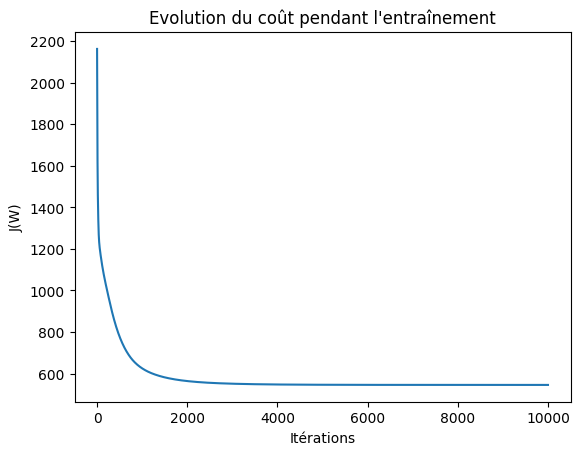

In [23]:
plt.plot(history)
plt.xlabel("Itérations")
plt.ylabel("J(W)")
plt.title("Evolution du coût pendant l\'entraînement")
plt.show()

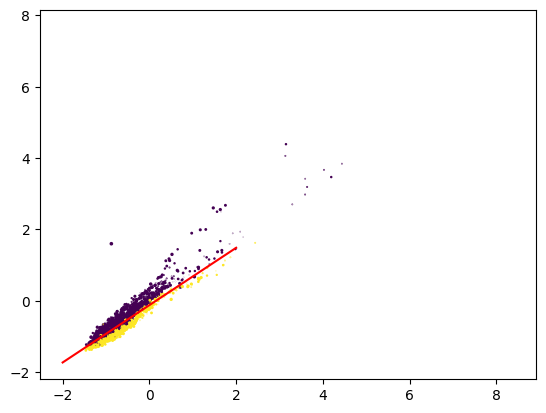

In [24]:
plt.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test[:])

X = np.arange(-2, 3)

Y = (- model.theta[0] - X * model.theta[1]) / model.theta[2]

plt.plot(X, Y, color='red')

plt.show()